# Object Detection with Yolov3 and OpenCV

YOLO is a state-of-the-art, real-time object detection algorithm. In this notebook, we will apply the YOLO algorithm to detect objects in images. 

## Loading libraries

First, loading the required libraries - *OpenCV* and *Matplotlib*. We also import `utils` module for helper functions and *Darknet*. 

In [2]:
import cv2
import matplotlib.pyplot as plt

from utils import *
from darknet import Darknet

## Neural Network

Darknet is a open source, deep neural network framework by YOLO creators. The architecture of the neural network is readily available on the yoloo website as `.cfg` file. Also, the COCO dataset is pre-trained with specific weights `.weights` and been trained on the datset. The object names are saved in `coco.names` file.

In [3]:
cfg_file = './cfg/yolov3.cfg'

weight_file = './weights/yolov3.weights'

namesfile = 'data/coco.names'

m = Darknet(cfg_file) #neural network architecture

m.load_weights(weight_file) #pre-trained weights

class_names = load_class_names(namesfile) #object class names in the dataset

In [4]:
m.print_network() #Looking at the neural network

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256
   13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128
   14 conv    256  3 x 3 / 1    52 x  52 x 128   ->    52 x  52 x 256
   15 shortcut 12
   16 conv    128  1 x 1

# Loading and Resizing Our Images

Using `opencv` to load the images and resizing them to be compatable with the input size of the first layer. By default, `cv2.imread` reads images in BGR colors. Hence, changing them to RGB colors.

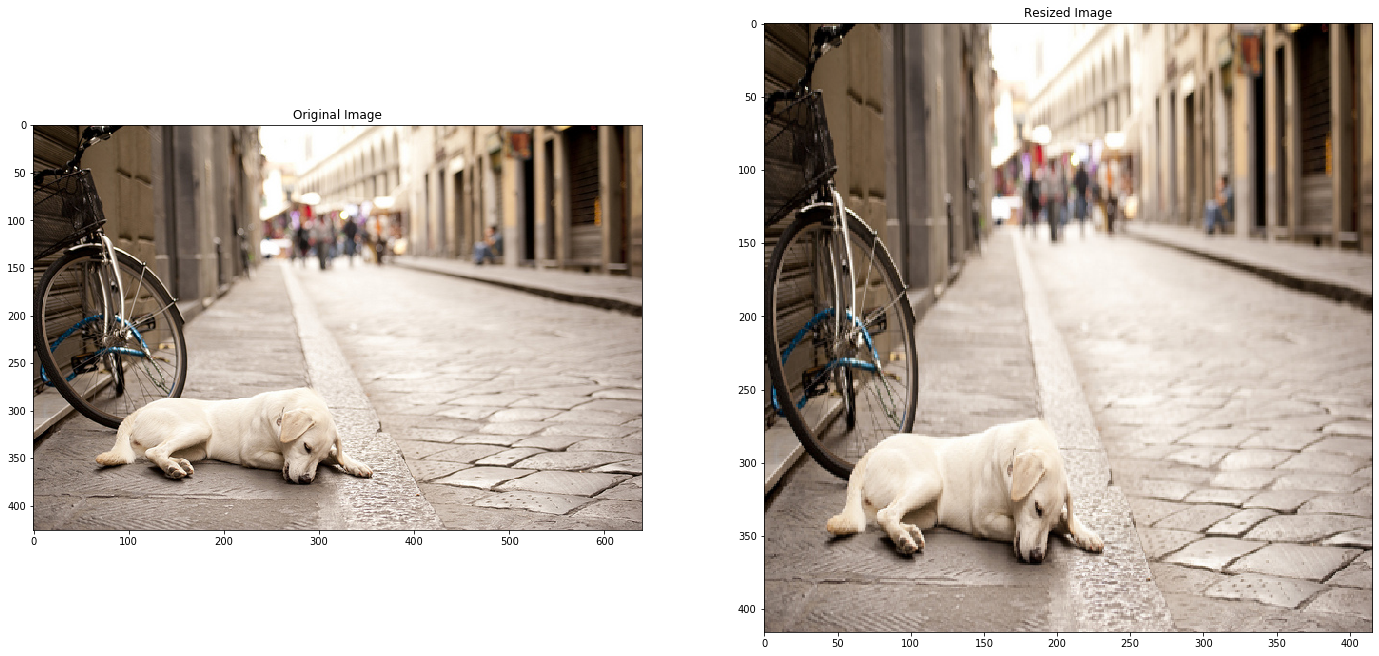

In [10]:
plt.rcParams['figure.figsize'] = [24.0, 14.0] #figure size

img = cv2.imread('./images/dog2.jpg')

original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
resized_image = cv2.resize(original_image, (m.width, m.height)) #Reshaping the image to the size of the first layer

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

Predicting the bounding boxes and suppressing the boxes with least confidence, i.e., under o.6 threshold value.

In [11]:
nms_thresh = 0.6   #Non-max suppression threshold

Now, setting up the IOU (INtersection Over Union) threshold, to elimimnate the bounding boxes with IOU greater than 0.4 w.r.t. the best bounding boxes.

In [12]:
iou_thresh = 0.4 #IOU threshold

## Object Detection

The `utils` object detection function detects the object taking into account the neural network model from darknet and parameters defined above.



It took 1.413 seconds to detect the objects in the image.

Number of Objects Detected: 4 

Objects Found and Confidence Level:

1. dog: 0.999024
2. bicycle: 0.999822
3. person: 1.000000
4. person: 1.000000


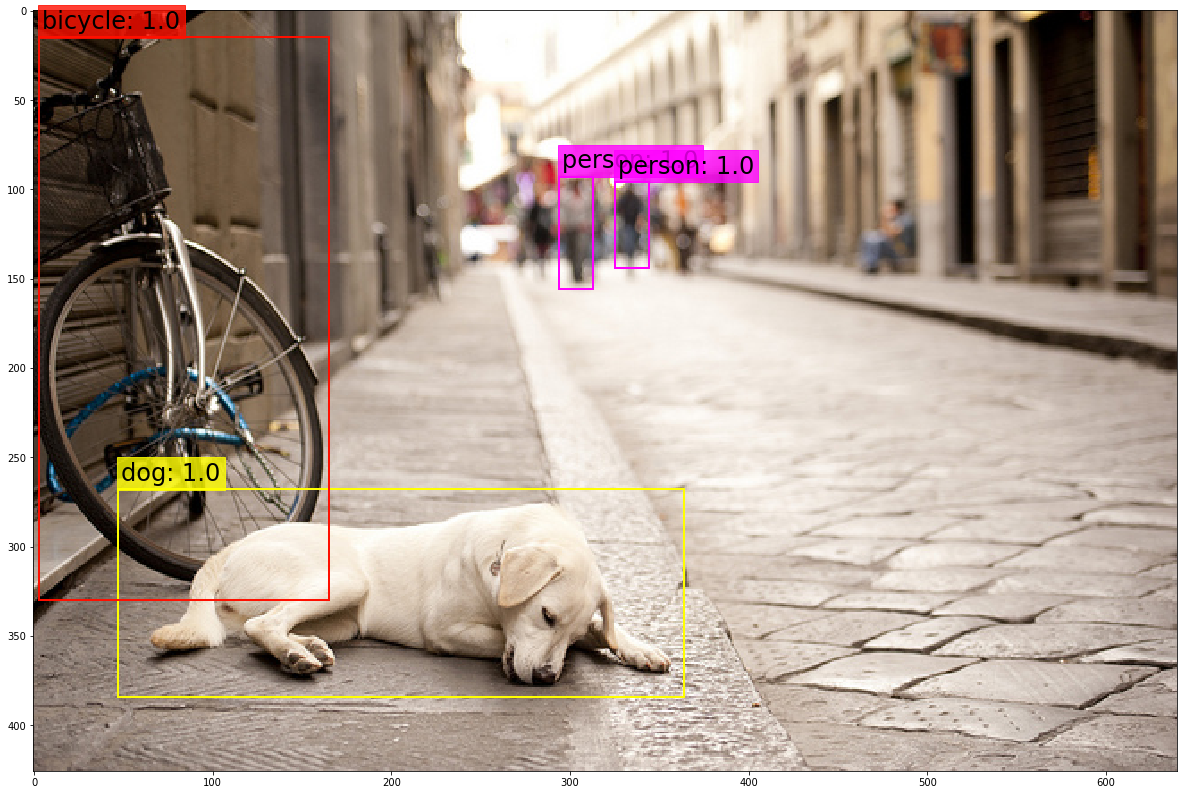

In [13]:
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh) #detecting objects

print_objects(boxes, class_names) #printing the objects found and the confidence level

plot_boxes(original_image, boxes, class_names, plot_labels = True) #plotting the image with bounding boxes and class labels